In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# !pip install tensorflow

In [2]:
main_path = r'.'
data_path = main_path+'/data'
import sys
sys.path.append(main_path)
from BayDS.lib.pipeline import *
from typing import List, Set, Dict, Optional, Any, Tuple, Type, Union
from BayDS.lib.io import *
from BayDS.lib.training import *
import os
import pickle

## Merging original features and best features

In [2]:
data = pd.read_pickle('./temp/data.pkl')

In [3]:
best_features = pd.read_parquet('./FE2/Corr_features_3155.pqt')


In [4]:
best_features['userid'] = data['userid']


In [5]:
for i in range(30):
    best_features[f'field{i}'] = data[f'field{i}']
    best_features[f'goal1'] = data[f'goal1']
for i in range(1,6):
    best_features[f'indicator_goal2{i}'] = data[f'indicator_goal2{i}']
    best_features[f'goal2{i}'] = data[f'goal2{i}']

In [10]:
del data
gc.collect()

0

In [6]:
for col in best_features.columns:
    if best_features[col].dtypes.name == 'object':
        best_features[col] = pd.Categorical(best_features[col])

In [7]:
best_features.to_parquet("./FE2/BEST3155+Orig.pqt")

In [9]:
best_features.index

Int64Index([1000000, 1000001, 1000002, 1000003, 1000004, 1000005, 1000006,
            1000007, 1000008, 1000009,
            ...
             455001,  455002,  455003,  455004,  455005,  455006,  455007,
             455008,  455009,  455010],
           dtype='int64', name='orderid', length=651067)

## Training


In [18]:
import dask.dataframe as dd
best_features = pd.read_parquet("./FE4_OLEG/Corr_features_731.pqt")
initial_data = pd.read_pickle('./FE/initial_data.pkl')


In [19]:
for col in initial_data.columns:
    best_features[col] = initial_data[col]

In [20]:
exclude_features_from_training = ['indicator_goal21', 'indicator_goal22', 'indicator_goal23',
       'indicator_goal24', 'indicator_goal25', 'goal21', 'goal22', 'goal23','field12',
       'goal24', 'goal25', 'goal1','userid', 'order_till_hour', 'order_till_weekday', 'order_till_month', 'lang_country']

In [26]:
# rfe = pickle.load(open('./AGGCV/rfe/rfe_78.pkl','rb'))
# best_features = best_features[[col for col in best_features.columns if col not in bad_features]]

In [27]:
# removed_features = sum([r['removed'] for r in rfe[:48]], [])
# best_features = best_features[[f for f in best_features.columns if f not in removed_features]]

In [21]:
best_features

,field0,field1,field2,field3,field4,field5,field6,field7,field8,field9,...,goal1,field0bin,field6bin,field13bin,field16bin,field17bin,field22bin,field25bin,price1bin,price2bin
orderid,,,,,,,,,,,,,,,,,,,,,
1000000,0,-0.626508116722107,11,12,1,1,0,1,1,0,...,0,0,0,3,2,0,0,0,0,0
1000001,144,-0.393794029951096,5,7,2,0,0,2,1,0,...,0,3,0,0,8,0,7,2,3,4
1000002,134,-0.548936784267426,2,3,2,0,0,1,1,0,...,0,3,0,0,2,0,2,0,1,0
1000003,0,-0.238651320338249,10,11,1,1,3,2,1,0,...,0,0,1,0,6,0,5,1,4,1
1000004,0,-0.704079508781433,8,11,1,1,0,1,1,0,...,0,0,0,0,8,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455006,0,2.553917646408081,8,8,1,1,10,2,0,0,...,-1,0,2,2,6,0,7,2,9,8
455007,0,-0.238651320338249,9,9,1,1,1,1,1,0,...,-1,0,0,5,6,0,3,0,4,5
455008,0,-0.161079958081245,10,11,1,1,0,1,1,0,...,-1,0,0,0,0,0,4,0,5,6


In [22]:
appended_features = pd.read_parquet('./FE_MANUAL/fe.pqt')

In [23]:
new_columns = [col for col in appended_features.columns if col not in best_features.columns]

In [24]:
sum(appended_features.index != best_features.index)

0

In [25]:
best_features=pd.concat([best_features,appended_features[new_columns]],axis=1)

In [26]:
len(best_features.columns), len(set(best_features.columns))

(784, 784)

In [12]:
del appended_features
gc.collect()

NameError: name 'appended_features' is not defined

In [27]:
best_features.head()

,field0,field1,field2,field3,field4,field5,field6,field7,field8,field9,...,is1Ticket,hasChildren,hasChildren_cumsum,price1_dividedBy_price2,price1_dividedBy_price2_field15,field17_times_field13,daysToNextOrder,daysToNextOrder_dividedBy_field16,daysToNextFlight,daysToNextFlight_dividedBy_field16
orderid,,,,,,,,,,,,,,,,,,,,,
1000000,0,-0.626508116722107,11,12,1,1,0,1,1,0,...,1,0,3383,1.000000000000000,1.000000000000000,20,0.0,0.000000000000000,20.0,5.000000000000000
1000001,144,-0.393794029951096,5,7,2,0,0,2,1,0,...,1,0,15312,1.000000000000000,1.000000000000000,3,0.0,0.000000000000000,1.0,0.017543859649123
1000002,134,-0.548936784267426,2,3,2,0,0,1,1,0,...,1,0,38444,1.500000000000000,1.500000000000000,3,0.0,0.000000000000000,2.0,0.500000000000000
1000003,0,-0.238651320338249,10,11,1,1,3,2,1,0,...,0,0,748,2.666666666666667,1.333333333333333,3,283.0,12.863636363636363,303.0,13.772727272727273
1000004,0,-0.704079508781433,8,11,1,1,0,1,1,0,...,1,0,43036,1.000000000000000,1.000000000000000,3,0.0,0.000000000000000,28.0,0.280000000000000


In [35]:
# del y,test
# gc.collect()


0

In [28]:
train_idx = best_features[best_features['goal1']>=0].index
test_idx = best_features[best_features['goal1']<0].index
X = best_features.loc[train_idx]
y = best_features[best_features['goal1']>=0]['goal1']
test=best_features.loc[test_idx]
train_features = [f for f in best_features.columns if f not in exclude_features_from_training]

In [29]:
del best_features
gc.collect()

18983

In [30]:
import numpy as np
from collections import Counter, defaultdict
from sklearn.utils import check_random_state

class RepeatedStratifiedGroupKFold():

    def __init__(self, n_splits=5, n_repeats=1, random_state=69):
        self.n_splits = n_splits
        self.n_repeats = n_repeats
        self.random_state = random_state
        
    # Implementation based on this kaggle kernel:
    #    https://www.kaggle.com/jakubwasikowski/stratified-group-k-fold-cross-validation
    def split(self, X, y=None, groups=None):
        k = self.n_splits
        def eval_y_counts_per_fold(y_counts, fold):
            y_counts_per_fold[fold] += y_counts
            std_per_label = []
            for label in range(labels_num):
                label_std = np.std(
                    [y_counts_per_fold[i][label] / y_distr[label] for i in range(k)]
                )
                std_per_label.append(label_std)
            y_counts_per_fold[fold] -= y_counts
            return np.mean(std_per_label)
            
        rnd = check_random_state(self.random_state)
        for repeat in range(self.n_repeats):
            labels_num = np.max(y) + 1
            y_counts_per_group = defaultdict(lambda: np.zeros(labels_num))
            y_distr = Counter()
            for label, g in zip(y, groups):
                y_counts_per_group[g][label] += 1
                y_distr[label] += 1

            y_counts_per_fold = defaultdict(lambda: np.zeros(labels_num))
            groups_per_fold = defaultdict(set)
        
            groups_and_y_counts = list(y_counts_per_group.items())
            rnd.shuffle(groups_and_y_counts)

            for g, y_counts in sorted(groups_and_y_counts, key=lambda x: -np.std(x[1])):
                best_fold = None
                min_eval = None
                for i in range(k):
                    fold_eval = eval_y_counts_per_fold(y_counts, i)
                    if min_eval is None or fold_eval < min_eval:
                        min_eval = fold_eval
                        best_fold = i
                y_counts_per_fold[best_fold] += y_counts
                groups_per_fold[best_fold].add(g)

            all_groups = set(groups)
            for i in range(k):
                train_groups = all_groups - groups_per_fold[i]
                test_groups = groups_per_fold[i]

                train_indices = [i for i, g in enumerate(groups) if g in train_groups]
                test_indices = [i for i, g in enumerate(groups) if g in test_groups]

                yield train_indices, test_indices

In [31]:
from sklearn.model_selection import GroupKFold, KFold

NFOLDS = 5
folds = RepeatedStratifiedGroupKFold(n_splits=NFOLDS)
params = {
          "verbosity": -1,
          'num_leaves': 491,
#           'min_child_weight': 0.03454472573214212,
          'feature_fraction': 0.1797454081646243,
          'bagging_fraction': 0.4181193142567742,
          'min_data_in_leaf': 106,
          'objective': 'binary',
          'max_depth': 4,
          'learning_rate': 0.001,
          "boosting_type": "gbdt",
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": -1,
#           'reg_alpha': 0.3899927210061127,
#           'reg_lambda': 0.6485237330340494,
          'random_state': 47
         }
train_options = {
        "model_type":'lgb',
        "params": params,
        "eval_metric":'auc',
        'early_stopping_rounds': 300,
        'n_estimators': 30000,
        'averaging': 'rank',
        'use_groups': False,
        'fold_name': folds.__class__.__name__,
        'n_splits': NFOLDS
    }

In [34]:
pd.__version__


'1.0.0rc0'

In [32]:
y = y.astype(np.uint8)

In [34]:
###SAVE RESULTS
import datetime
t = datetime.datetime.now().strftime("%m-%d-%H-%M")
test['proba'] = result_dict['prediction']
sub = pd.read_csv('data/onetwotrip_challenge_sub1.csv')
sub['proba'] = test['proba'] / test['proba'].max()
sub.reset_index(drop=True).set_index('orderid').to_csv(f'temp/submission-{t}.csv')

import pickle
pickle.dump(result_dict, open(f'temp/submission-{t}.pkl','wb'))

Fold 1 started at Sun Jan 19 20:10:37 2020
Training until validation scores don't improve for 300 rounds
[100]	training's auc: 0.710092	training's auc: 0.710092	valid_1's auc: 0.699088	valid_1's auc: 0.699089
[200]	training's auc: 0.720498	training's auc: 0.720498	valid_1's auc: 0.705122	valid_1's auc: 0.705122
[300]	training's auc: 0.729015	training's auc: 0.729015	valid_1's auc: 0.709274	valid_1's auc: 0.709274
[400]	training's auc: 0.736266	training's auc: 0.736266	valid_1's auc: 0.711652	valid_1's auc: 0.711652
[500]	training's auc: 0.743334	training's auc: 0.743334	valid_1's auc: 0.713537	valid_1's auc: 0.713537
[600]	training's auc: 0.750079	training's auc: 0.750079	valid_1's auc: 0.714609	valid_1's auc: 0.714609
[700]	training's auc: 0.755296	training's auc: 0.755296	valid_1's auc: 0.715088	valid_1's auc: 0.715088
[800]	training's auc: 0.759956	training's auc: 0.759956	valid_1's auc: 0.715554	valid_1's auc: 0.715554
[900]	training's auc: 0.764605	training's auc: 0.764605	valid_1

[1100]	training's auc: 0.777443	training's auc: 0.777443	valid_1's auc: 0.708767	valid_1's auc: 0.708767
[1200]	training's auc: 0.780807	training's auc: 0.780807	valid_1's auc: 0.709274	valid_1's auc: 0.709274
[1300]	training's auc: 0.78417	training's auc: 0.78417	valid_1's auc: 0.709768	valid_1's auc: 0.709768
[1400]	training's auc: 0.787503	training's auc: 0.787503	valid_1's auc: 0.710161	valid_1's auc: 0.710161
[1500]	training's auc: 0.790632	training's auc: 0.790632	valid_1's auc: 0.710358	valid_1's auc: 0.710358
[1600]	training's auc: 0.793733	training's auc: 0.793733	valid_1's auc: 0.710757	valid_1's auc: 0.710757
[1700]	training's auc: 0.796695	training's auc: 0.796695	valid_1's auc: 0.71107	valid_1's auc: 0.71107
[1800]	training's auc: 0.799329	training's auc: 0.799329	valid_1's auc: 0.711193	valid_1's auc: 0.711193
[1900]	training's auc: 0.801495	training's auc: 0.801495	valid_1's auc: 0.711116	valid_1's auc: 0.711116
[2000]	training's auc: 0.803631	training's auc: 0.803631	va

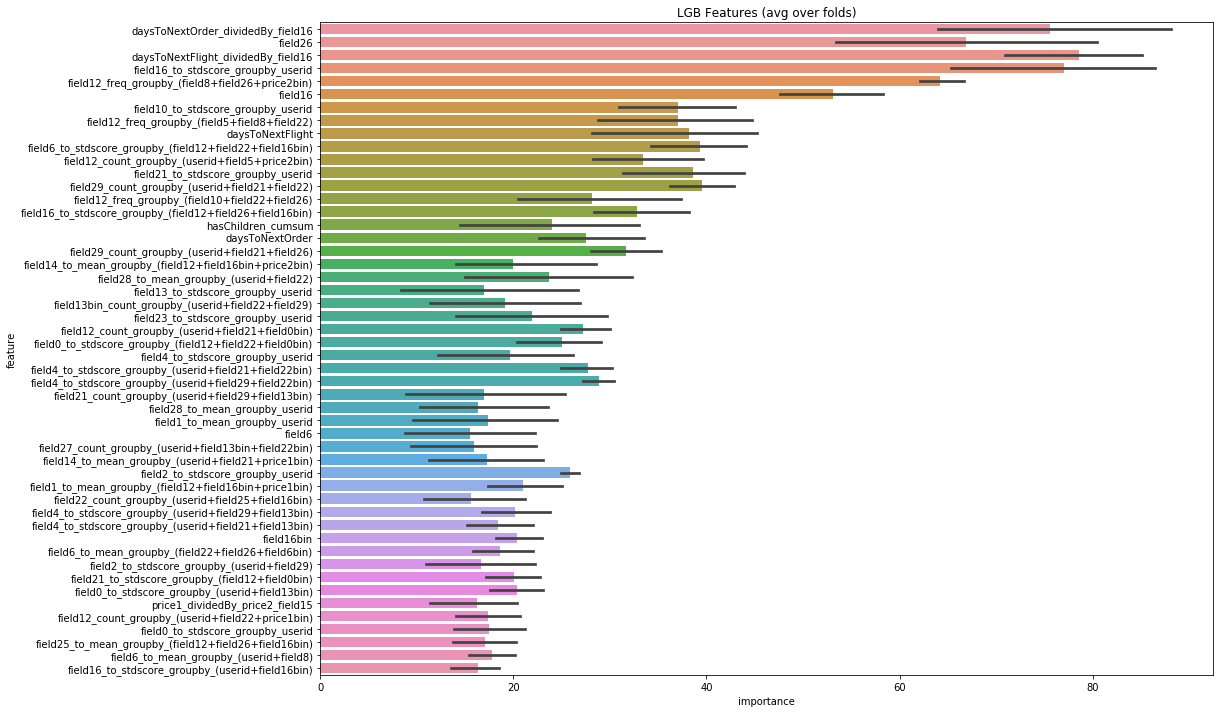

In [33]:
# 731 Olegs + manual FE
params = {
          "verbosity": -1,
          'num_leaves': 491,
#           'min_child_weight': 0.03454472573214212,
          'feature_fraction': 0.3,
          'bagging_fraction': 0.4,
          'min_data_in_leaf': 106,
          'objective': 'binary',
          'max_depth': 4,
          'learning_rate': 0.005,
          "boosting_type": "gbdt",
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": -1,
#           'reg_alpha': 0.3899927210061127,
#           'reg_lambda': 0.6485237330340494,
          'random_state': 47
         }
train_options = {
        "model_type":'lgb',
        "params": params,
        "eval_metric":'auc',
        'early_stopping_rounds': 300,
        'n_estimators': 30000,
        'averaging': 'rank',
        'use_groups': False,
        'fold_name': folds.__class__.__name__,
        'n_splits': NFOLDS
    }
gc.collect()
result_dict = train_model_classification_vb( X=X, 
                                             X_test=test, 
                                             columns=train_features,
                                             y=y, 
                                             params=params, folds=folds,
                                             model_type=train_options['model_type'], 
                                             plot_feature_importance=True,
                                             verbose=100, early_stopping_rounds=train_options['early_stopping_rounds'],
                                             n_estimators=train_options['n_estimators'], 
                                             averaging=train_options['averaging'],
                                             groups=X['userid'],
                                             n_jobs=-1)

Fold 1 started at Sun Jan 19 19:51:53 2020
Training until validation scores don't improve for 300 rounds
[100]	training's auc: 0.703996	training's auc: 0.704	valid_1's auc: 0.693698	valid_1's auc: 0.693716
[200]	training's auc: 0.713387	training's auc: 0.713386	valid_1's auc: 0.700347	valid_1's auc: 0.700343
[300]	training's auc: 0.722394	training's auc: 0.722396	valid_1's auc: 0.704012	valid_1's auc: 0.704015
[400]	training's auc: 0.729521	training's auc: 0.729522	valid_1's auc: 0.706816	valid_1's auc: 0.706816
[500]	training's auc: 0.736327	training's auc: 0.736327	valid_1's auc: 0.709126	valid_1's auc: 0.709126
[600]	training's auc: 0.742945	training's auc: 0.742945	valid_1's auc: 0.710871	valid_1's auc: 0.710872
[700]	training's auc: 0.748758	training's auc: 0.748758	valid_1's auc: 0.711353	valid_1's auc: 0.711353
[800]	training's auc: 0.754157	training's auc: 0.754157	valid_1's auc: 0.711783	valid_1's auc: 0.711783
[900]	training's auc: 0.759021	training's auc: 0.759021	valid_1's 

[1800]	training's auc: 0.789648	training's auc: 0.789648	valid_1's auc: 0.699902	valid_1's auc: 0.699902
[1900]	training's auc: 0.792061	training's auc: 0.792061	valid_1's auc: 0.699995	valid_1's auc: 0.699995
[2000]	training's auc: 0.794229	training's auc: 0.794229	valid_1's auc: 0.699956	valid_1's auc: 0.699956
[2100]	training's auc: 0.796532	training's auc: 0.796532	valid_1's auc: 0.700018	valid_1's auc: 0.700018
[2200]	training's auc: 0.798627	training's auc: 0.798627	valid_1's auc: 0.700066	valid_1's auc: 0.700066
[2300]	training's auc: 0.800717	training's auc: 0.800717	valid_1's auc: 0.700129	valid_1's auc: 0.700129
[2400]	training's auc: 0.802863	training's auc: 0.802863	valid_1's auc: 0.700118	valid_1's auc: 0.700118
[2500]	training's auc: 0.804878	training's auc: 0.804878	valid_1's auc: 0.700301	valid_1's auc: 0.700301
[2600]	training's auc: 0.806761	training's auc: 0.806761	valid_1's auc: 0.700281	valid_1's auc: 0.700281
[2700]	training's auc: 0.808436	training's auc: 0.80843

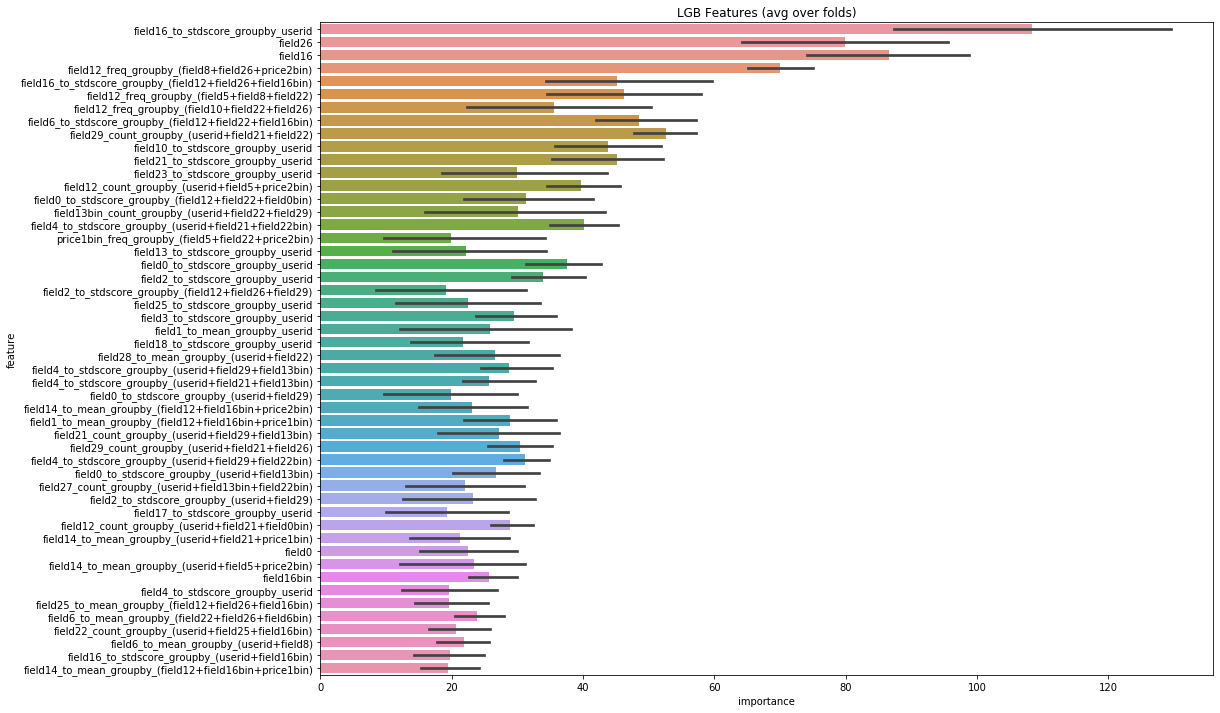

In [14]:
# 731 Oleg's features
params = {
          "verbosity": -1,
          'num_leaves': 491,
#           'min_child_weight': 0.03454472573214212,
          'feature_fraction': 0.3,
          'bagging_fraction': 0.4,
          'min_data_in_leaf': 106,
          'objective': 'binary',
          'max_depth': 4,
          'learning_rate': 0.005,
          "boosting_type": "gbdt",
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": -1,
#           'reg_alpha': 0.3899927210061127,
#           'reg_lambda': 0.6485237330340494,
          'random_state': 47
         }
train_options = {
        "model_type":'lgb',
        "params": params,
        "eval_metric":'auc',
        'early_stopping_rounds': 300,
        'n_estimators': 30000,
        'averaging': 'rank',
        'use_groups': False,
        'fold_name': folds.__class__.__name__,
        'n_splits': NFOLDS
    }
gc.collect()
result_dict = train_model_classification_vb( X=X, 
                                             X_test=test, 
                                             columns=train_features,
                                             y=y, 
                                             params=params, folds=folds,
                                             model_type=train_options['model_type'], 
                                             plot_feature_importance=True,
                                             verbose=100, early_stopping_rounds=train_options['early_stopping_rounds'],
                                             n_estimators=train_options['n_estimators'], 
                                             averaging=train_options['averaging'],
                                             groups=X['userid'],
                                             n_jobs=-1)

Fold 1 started at Wed Jan 15 19:25:58 2020
Training until validation scores don't improve for 300 rounds
[100]	training's auc: 0.704593	training's auc: 0.704592	valid_1's auc: 0.690761	valid_1's auc: 0.69076
[200]	training's auc: 0.71665	training's auc: 0.71665	valid_1's auc: 0.69591	valid_1's auc: 0.695911
[300]	training's auc: 0.727872	training's auc: 0.727873	valid_1's auc: 0.699998	valid_1's auc: 0.699998
[400]	training's auc: 0.738252	training's auc: 0.738252	valid_1's auc: 0.703496	valid_1's auc: 0.703496
[500]	training's auc: 0.747447	training's auc: 0.747446	valid_1's auc: 0.705885	valid_1's auc: 0.705885
[600]	training's auc: 0.756255	training's auc: 0.756255	valid_1's auc: 0.707809	valid_1's auc: 0.707809
[700]	training's auc: 0.763381	training's auc: 0.763381	valid_1's auc: 0.709735	valid_1's auc: 0.709735
[800]	training's auc: 0.769942	training's auc: 0.769942	valid_1's auc: 0.710825	valid_1's auc: 0.710825
[900]	training's auc: 0.776563	training's auc: 0.776563	valid_1's a

[100]	training's auc: 0.708425	training's auc: 0.708428	valid_1's auc: 0.677977	valid_1's auc: 0.677983
[200]	training's auc: 0.720402	training's auc: 0.720403	valid_1's auc: 0.681121	valid_1's auc: 0.681122
[300]	training's auc: 0.731487	training's auc: 0.731488	valid_1's auc: 0.684348	valid_1's auc: 0.68435
[400]	training's auc: 0.741164	training's auc: 0.741164	valid_1's auc: 0.687635	valid_1's auc: 0.687635
[500]	training's auc: 0.749481	training's auc: 0.74948	valid_1's auc: 0.689647	valid_1's auc: 0.689647
[600]	training's auc: 0.757579	training's auc: 0.757579	valid_1's auc: 0.691228	valid_1's auc: 0.691228
[700]	training's auc: 0.764933	training's auc: 0.764933	valid_1's auc: 0.692964	valid_1's auc: 0.692964
[800]	training's auc: 0.771133	training's auc: 0.771133	valid_1's auc: 0.694271	valid_1's auc: 0.694271
[900]	training's auc: 0.777336	training's auc: 0.777336	valid_1's auc: 0.695057	valid_1's auc: 0.695057
[1000]	training's auc: 0.783179	training's auc: 0.783179	valid_1's

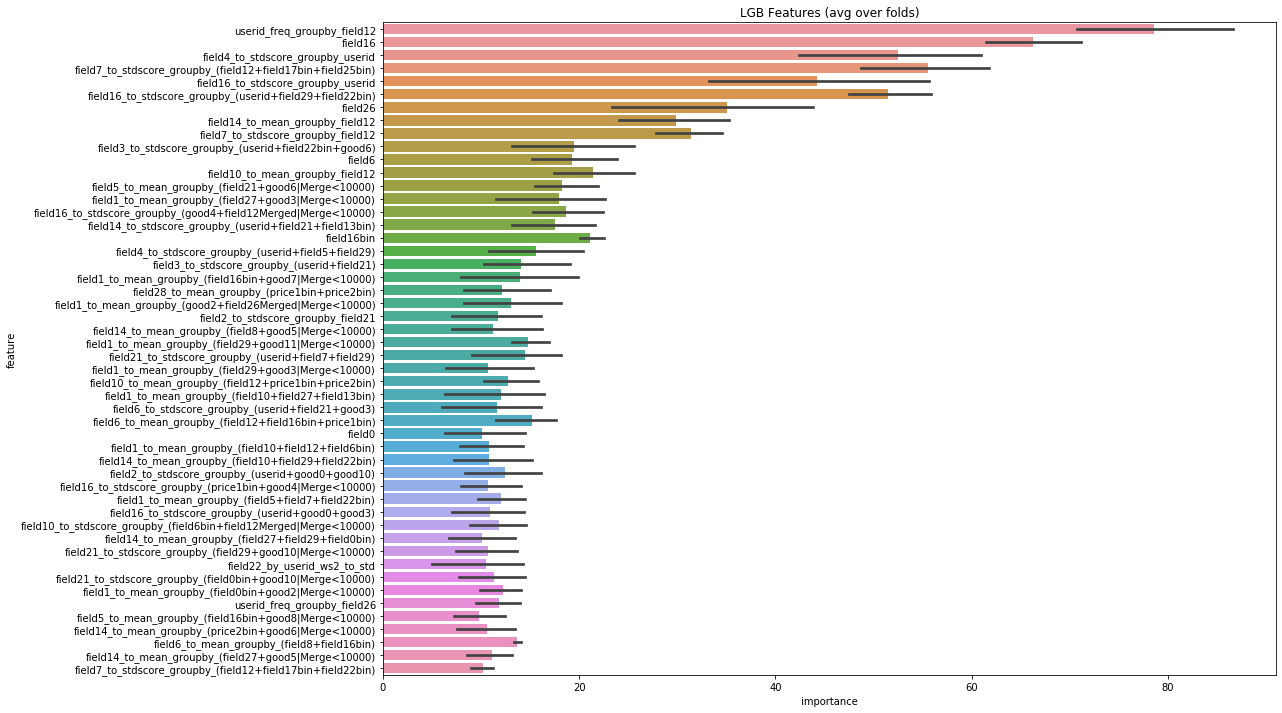

In [14]:
# Hardly correlated features
gc.collect()
result_dict = train_model_classification_vb( X=X, 
                                             X_test=test, 
                                             columns=train_features,
                                             y=y, 
                                             params=params, folds=folds,
                                             model_type=train_options['model_type'], 
                                             plot_feature_importance=True,
                                             verbose=100, early_stopping_rounds=train_options['early_stopping_rounds'],
                                             n_estimators=train_options['n_estimators'], 
                                             averaging=train_options['averaging'],
                                             groups=X['userid'],
                                             n_jobs=-1)

## Goal2

In [36]:
exclude_features_from_training = ['indicator_goal21', 'indicator_goal22', 'indicator_goal23',
       'indicator_goal24', 'indicator_goal25', 'goal21', 'goal22', 'goal23',
       'goal24', 'goal25', 'goal1','userid',]

In [46]:
gc.collect()

354

In [38]:
sub2 = pd.read_csv('data/onetwotrip_challenge_sub2.csv')

In [39]:
sub2.columns = ['orderid', 'goal21', 'goal22', 'goal23', 'goal24', 'goal25']
sub2 = pd.DataFrame(0, columns=sub2.columns, index=sub2.index)

Goal  1
Fold 1 started at Sun Jan  5 21:15:27 2020
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.71544	training's auc: 0.715442	valid_1's auc: 0.7165	valid_1's auc: 0.716445
[200]	training's auc: 0.72328	training's auc: 0.723281	valid_1's auc: 0.720645	valid_1's auc: 0.720643
[300]	training's auc: 0.730429	training's auc: 0.730429	valid_1's auc: 0.722425	valid_1's auc: 0.722425
[400]	training's auc: 0.737311	training's auc: 0.737311	valid_1's auc: 0.725314	valid_1's auc: 0.725314
[500]	training's auc: 0.742654	training's auc: 0.742654	valid_1's auc: 0.727404	valid_1's auc: 0.727404
[600]	training's auc: 0.746959	training's auc: 0.746959	valid_1's auc: 0.728532	valid_1's auc: 0.728532
[700]	training's auc: 0.751133	training's auc: 0.751133	valid_1's auc: 0.72906	valid_1's auc: 0.72906
[800]	training's auc: 0.755381	training's auc: 0.755381	valid_1's auc: 0.729216	valid_1's auc: 0.729216
[900]	training's auc: 0.759224	training's auc: 0.759224	vali

[1000]	training's auc: 0.770899	training's auc: 0.770899	valid_1's auc: 0.694671	valid_1's auc: 0.694671
[1100]	training's auc: 0.774391	training's auc: 0.774391	valid_1's auc: 0.695147	valid_1's auc: 0.695147
[1200]	training's auc: 0.777412	training's auc: 0.777412	valid_1's auc: 0.695678	valid_1's auc: 0.695678
[1300]	training's auc: 0.780399	training's auc: 0.780399	valid_1's auc: 0.696032	valid_1's auc: 0.696032
[1400]	training's auc: 0.78314	training's auc: 0.78314	valid_1's auc: 0.696323	valid_1's auc: 0.696323
[1500]	training's auc: 0.785783	training's auc: 0.785783	valid_1's auc: 0.69646	valid_1's auc: 0.69646
[1600]	training's auc: 0.788481	training's auc: 0.788481	valid_1's auc: 0.696664	valid_1's auc: 0.696664
[1700]	training's auc: 0.791106	training's auc: 0.791106	valid_1's auc: 0.696784	valid_1's auc: 0.696784
[1800]	training's auc: 0.793636	training's auc: 0.793636	valid_1's auc: 0.696893	valid_1's auc: 0.696893
[1900]	training's auc: 0.795964	training's auc: 0.795964	va

[2300]	training's auc: 0.745588	training's auc: 0.745588	valid_1's auc: 0.724847	valid_1's auc: 0.724847
[2400]	training's auc: 0.746522	training's auc: 0.746522	valid_1's auc: 0.72491	valid_1's auc: 0.72491
[2500]	training's auc: 0.747464	training's auc: 0.747464	valid_1's auc: 0.724991	valid_1's auc: 0.724991
[2600]	training's auc: 0.748405	training's auc: 0.748405	valid_1's auc: 0.725053	valid_1's auc: 0.725053
[2700]	training's auc: 0.749343	training's auc: 0.749343	valid_1's auc: 0.72516	valid_1's auc: 0.72516
[2800]	training's auc: 0.750287	training's auc: 0.750287	valid_1's auc: 0.725217	valid_1's auc: 0.725217
[2900]	training's auc: 0.751168	training's auc: 0.751168	valid_1's auc: 0.725266	valid_1's auc: 0.725266
[3000]	training's auc: 0.752061	training's auc: 0.752061	valid_1's auc: 0.725351	valid_1's auc: 0.725351
Did not meet early stopping. Best iteration is:
[3000]	training's auc: 0.752061	training's auc: 0.752061	valid_1's auc: 0.725351	valid_1's auc: 0.725351
Fold 3 star

[500]	training's auc: 0.724495	training's auc: 0.724495	valid_1's auc: 0.708257	valid_1's auc: 0.708257
[600]	training's auc: 0.726878	training's auc: 0.726878	valid_1's auc: 0.709297	valid_1's auc: 0.709297
[700]	training's auc: 0.729026	training's auc: 0.729026	valid_1's auc: 0.710093	valid_1's auc: 0.710093
[800]	training's auc: 0.730906	training's auc: 0.730906	valid_1's auc: 0.710648	valid_1's auc: 0.710648
[900]	training's auc: 0.732499	training's auc: 0.732499	valid_1's auc: 0.711141	valid_1's auc: 0.711141
[1000]	training's auc: 0.733882	training's auc: 0.733882	valid_1's auc: 0.711634	valid_1's auc: 0.711634
[1100]	training's auc: 0.735188	training's auc: 0.735188	valid_1's auc: 0.712028	valid_1's auc: 0.712028
[1200]	training's auc: 0.736522	training's auc: 0.736522	valid_1's auc: 0.71241	valid_1's auc: 0.71241
[1300]	training's auc: 0.737733	training's auc: 0.737733	valid_1's auc: 0.712748	valid_1's auc: 0.712748
[1400]	training's auc: 0.738829	training's auc: 0.738829	valid

[1500]	training's auc: 0.755849	training's auc: 0.755849	valid_1's auc: 0.667482	valid_1's auc: 0.667482
[1600]	training's auc: 0.759691	training's auc: 0.759691	valid_1's auc: 0.667777	valid_1's auc: 0.667777
[1700]	training's auc: 0.763143	training's auc: 0.763143	valid_1's auc: 0.668026	valid_1's auc: 0.668026
[1800]	training's auc: 0.766791	training's auc: 0.766791	valid_1's auc: 0.66827	valid_1's auc: 0.66827
[1900]	training's auc: 0.769942	training's auc: 0.769942	valid_1's auc: 0.668355	valid_1's auc: 0.668355
[2000]	training's auc: 0.773077	training's auc: 0.773077	valid_1's auc: 0.668621	valid_1's auc: 0.668621
Early stopping, best iteration is:
[1988]	training's auc: 0.772698	training's auc: 0.772698	valid_1's auc: 0.668667	valid_1's auc: 0.668667
Fold 4 started at Sun Jan  5 22:24:34 2020
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.678378	training's auc: 0.678379	valid_1's auc: 0.6622	valid_1's auc: 0.6622
[200]	training's auc: 0.68

Fold 2 started at Sun Jan  5 22:34:10 2020
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.702526	training's auc: 0.702526	valid_1's auc: 0.646091	valid_1's auc: 0.646091
[200]	training's auc: 0.714437	training's auc: 0.714437	valid_1's auc: 0.65212	valid_1's auc: 0.65212
[300]	training's auc: 0.727819	training's auc: 0.727819	valid_1's auc: 0.657602	valid_1's auc: 0.657602
[400]	training's auc: 0.737759	training's auc: 0.737759	valid_1's auc: 0.662157	valid_1's auc: 0.662157
[500]	training's auc: 0.746785	training's auc: 0.746785	valid_1's auc: 0.664936	valid_1's auc: 0.664936
[600]	training's auc: 0.754714	training's auc: 0.754714	valid_1's auc: 0.667104	valid_1's auc: 0.667104
[700]	training's auc: 0.761998	training's auc: 0.761998	valid_1's auc: 0.668617	valid_1's auc: 0.668617
[800]	training's auc: 0.768612	training's auc: 0.768612	valid_1's auc: 0.669947	valid_1's auc: 0.669947
[900]	training's auc: 0.774611	training's auc: 0.774611	valid_1'

[1100]	training's auc: 0.784357	training's auc: 0.784357	valid_1's auc: 0.676716	valid_1's auc: 0.676716
[1200]	training's auc: 0.789231	training's auc: 0.789231	valid_1's auc: 0.676913	valid_1's auc: 0.676913
[1300]	training's auc: 0.79399	training's auc: 0.79399	valid_1's auc: 0.677224	valid_1's auc: 0.677224
[1400]	training's auc: 0.798475	training's auc: 0.798475	valid_1's auc: 0.677689	valid_1's auc: 0.677689
[1500]	training's auc: 0.802628	training's auc: 0.802628	valid_1's auc: 0.678371	valid_1's auc: 0.678371
[1600]	training's auc: 0.807188	training's auc: 0.807188	valid_1's auc: 0.678665	valid_1's auc: 0.678665
[1700]	training's auc: 0.811199	training's auc: 0.811199	valid_1's auc: 0.678805	valid_1's auc: 0.678805
[1800]	training's auc: 0.814764	training's auc: 0.814764	valid_1's auc: 0.679059	valid_1's auc: 0.679059
[1900]	training's auc: 0.818146	training's auc: 0.818146	valid_1's auc: 0.679291	valid_1's auc: 0.679291
[2000]	training's auc: 0.821767	training's auc: 0.821767	

[2000]	training's auc: 0.947257	training's auc: 0.947257	valid_1's auc: 0.908952	valid_1's auc: 0.908952
[2100]	training's auc: 0.948362	training's auc: 0.948362	valid_1's auc: 0.908926	valid_1's auc: 0.908926
Early stopping, best iteration is:
[2030]	training's auc: 0.947615	training's auc: 0.947615	valid_1's auc: 0.908999	valid_1's auc: 0.908999
Fold 4 started at Sun Jan  5 23:01:39 2020
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.904453	training's auc: 0.904481	valid_1's auc: 0.900671	valid_1's auc: 0.900631
[200]	training's auc: 0.909079	training's auc: 0.909081	valid_1's auc: 0.903261	valid_1's auc: 0.903261
[300]	training's auc: 0.913021	training's auc: 0.913021	valid_1's auc: 0.90513	valid_1's auc: 0.90513
[400]	training's auc: 0.916918	training's auc: 0.916918	valid_1's auc: 0.906376	valid_1's auc: 0.906376
[500]	training's auc: 0.920156	training's auc: 0.920156	valid_1's auc: 0.907505	valid_1's auc: 0.907505
[600]	training's auc: 0.92

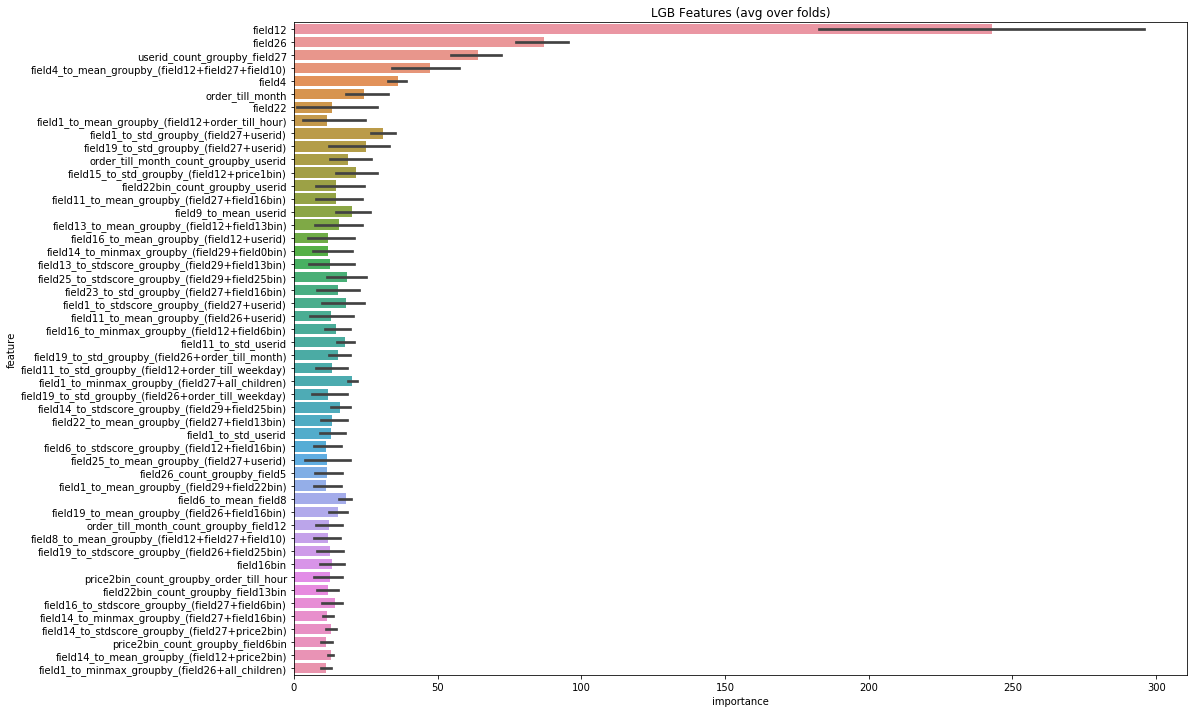

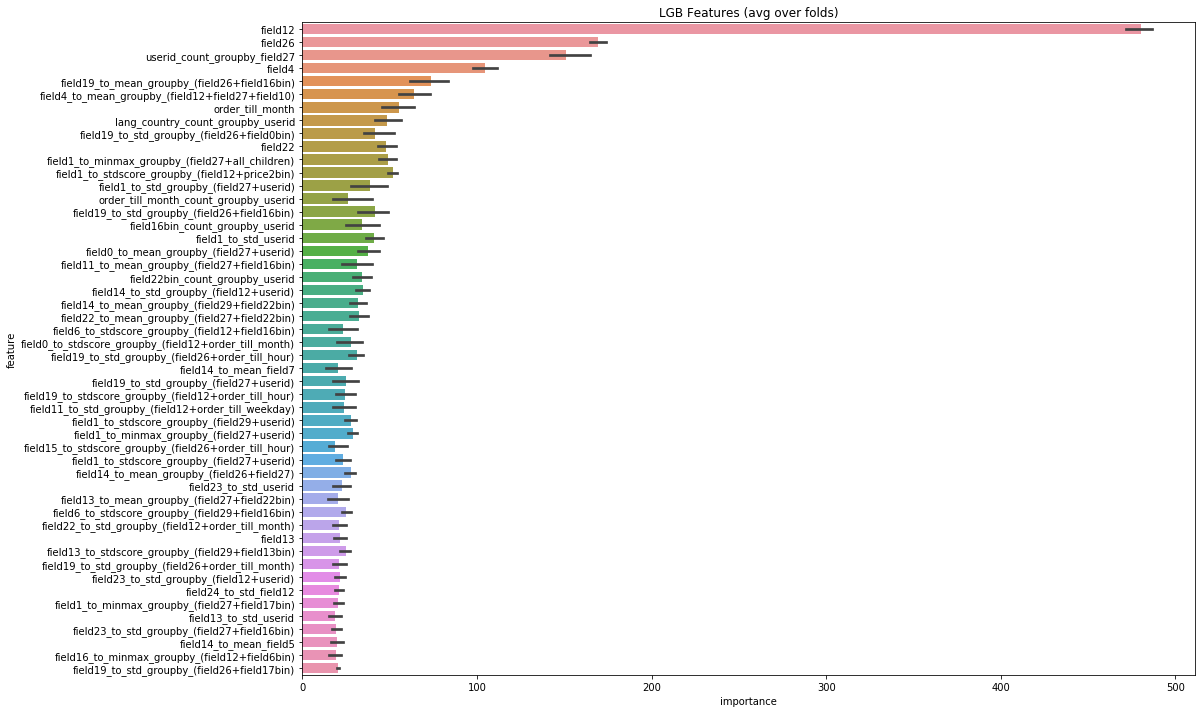

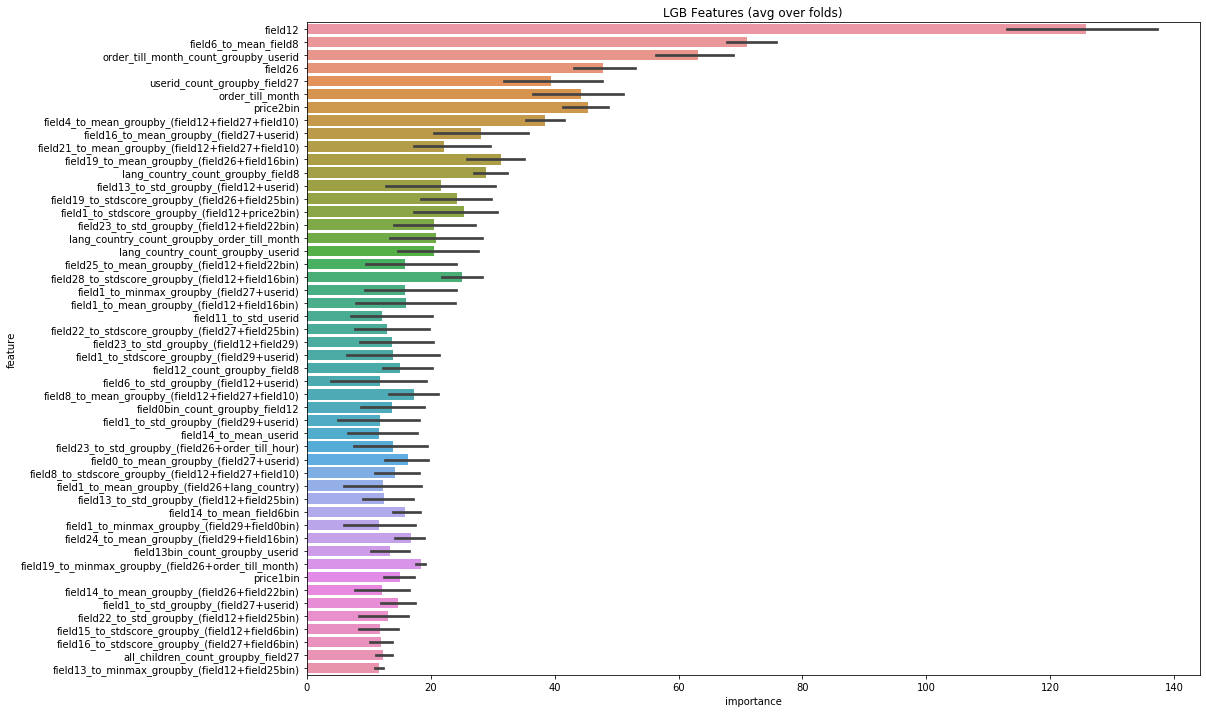

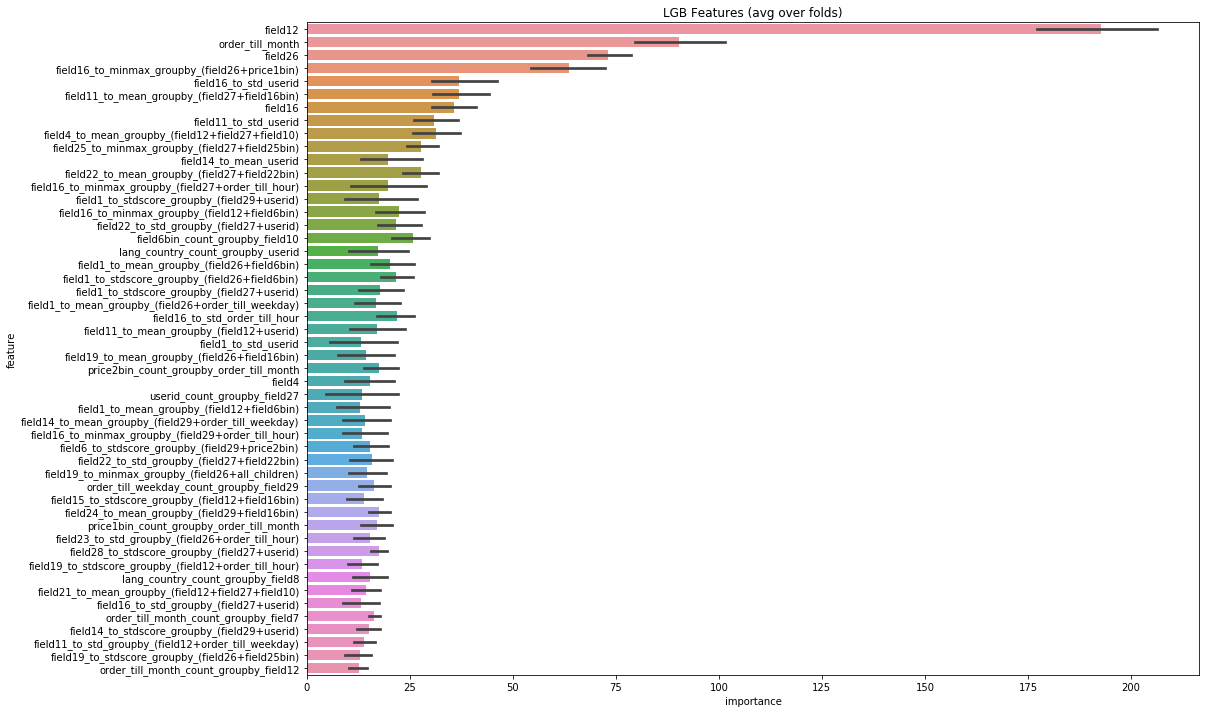

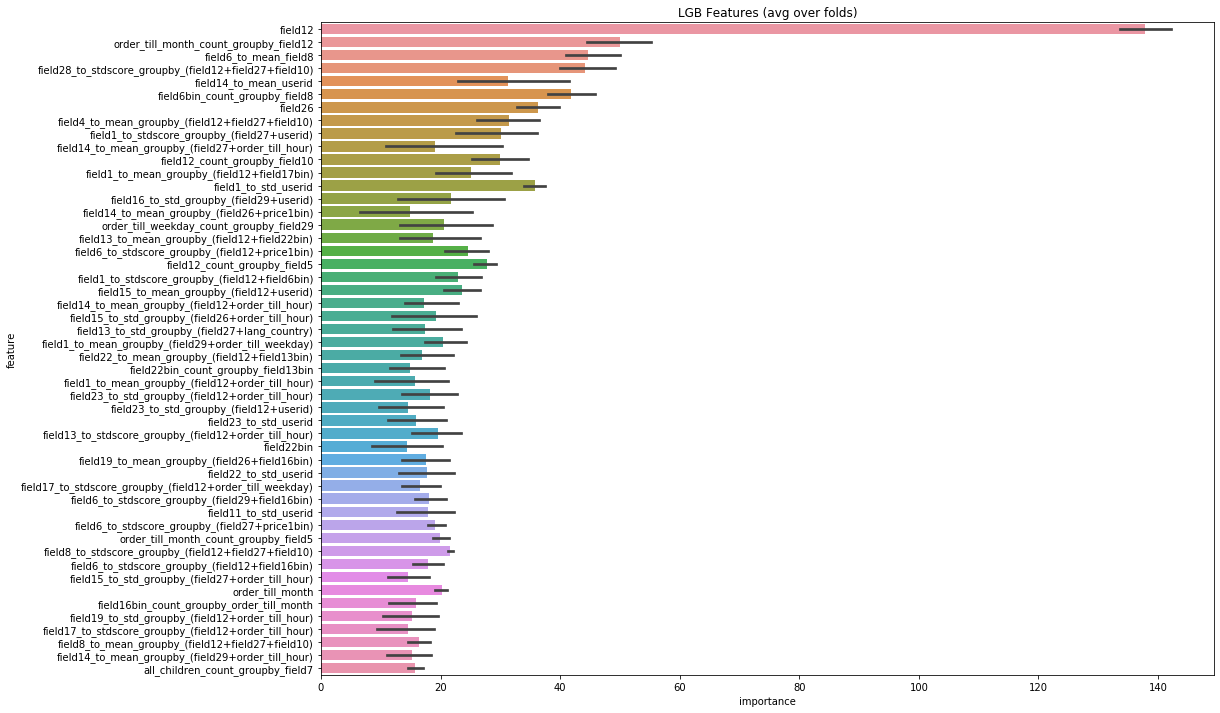

In [47]:
from sklearn.model_selection import GroupKFold, KFold

data = best_features
for i_goal in range(1,6):
    print ("Goal ", i_goal)
    data_filtered = data[data[f'indicator_goal2{i_goal}'] == 1]
    X = data_filtered[data_filtered[f'goal2{i_goal}']>=0].drop([f'goal2{i_goal}'], axis=1)
    y = data_filtered[data_filtered[f'goal2{i_goal}']>=0][f'goal2{i_goal}'].astype(np.uint8)
    del data_filtered
    gc.collect()
    test=data[data[f'goal2{i_goal}']<0]
    train_features = [f for f in data.columns if f not in exclude_features_from_training]


    NFOLDS = 5
    folds = RepeatedStratifiedGroupKFold(n_splits=NFOLDS)
    params = {
          "verbosity": -1,
          'num_leaves': 491,
          'min_child_weight': 0.03454472573214212,
          'feature_fraction': 0.3797454081646243,
          'bagging_fraction': 0.4181193142567742,
          'min_data_in_leaf': 106,
          'objective': 'binary',
          'max_depth': 4,
          'learning_rate': 0.005,
          "boosting_type": "gbdt",
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": -1,
          'reg_alpha': 0.3899927210061127,
          'reg_lambda': 0.6485237330340494,
          'random_state': 47
             }
    train_options = {
        "model_type":'lgb',
        "params": params,
        "eval_metric":'auc',
        'early_stopping_rounds': 100,
        'n_estimators': 3000,
        'averaging': 'rank',
        'use_groups': False,
        'fold_name': folds.__class__.__name__,
        'n_splits': NFOLDS
        }

    result_dict = train_model_classification_vb( X=X, 
                                                 X_test=test, 
                                                 columns=train_features,
                                                 y=y, 
                                                 params=params, folds=folds,
                                                 model_type=train_options['model_type'], 
                                                 plot_feature_importance=True,
                                                 verbose=100, early_stopping_rounds=train_options['early_stopping_rounds'],
                                                 n_estimators=train_options['n_estimators'], 
                                                 averaging=train_options['averaging'],
                                                 groups=X['userid'],
                                                 n_jobs=-1)
    test[f'proba2{i_goal}'] = result_dict['prediction']
    sub2[f'goal2{i_goal}'] = test[f'proba2{i_goal}'] / test[f'proba2{i_goal}'].max()
    
import datetime
t = datetime.datetime.now().strftime("%m-%d-%H-%M")
sub2.reset_index(drop=True).to_csv(f'temp/submission2-{t}.csv')

In [49]:
t = datetime.datetime.now().strftime("%m-%d-%H-%M")
sub2.drop(['orderid'],axis=1).reset_index(drop=True).to_csv(f'temp/submission2-{t}.csv')

## Results

### NO FE. initial

Fold 1 started at Sun Dec 15 19:17:47 2019
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.8352	training's auc: 0.8352	valid_1's auc: 0.660413	valid_1's auc: 0.660413
Early stopping, best iteration is:
[36]	training's auc: 0.769533	training's auc: 0.769533	valid_1's auc: 0.671052	valid_1's auc: 0.671052
Fold 2 started at Sun Dec 15 19:17:58 2019
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.832962	training's auc: 0.832962	valid_1's auc: 0.708005	valid_1's auc: 0.708005
Early stopping, best iteration is:
[27]	training's auc: 0.742707	training's auc: 0.742708	valid_1's auc: 0.71381	valid_1's auc: 0.713811
Fold 3 started at Sun Dec 15 19:18:06 2019
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.833846	training's auc: 0.833846	valid_1's auc: 0.684287	valid_1's auc: 0.684287
Early stopping, best iteration is:
[28]	training's auc: 0.753781	training's auc: 0.753782	valid_1's

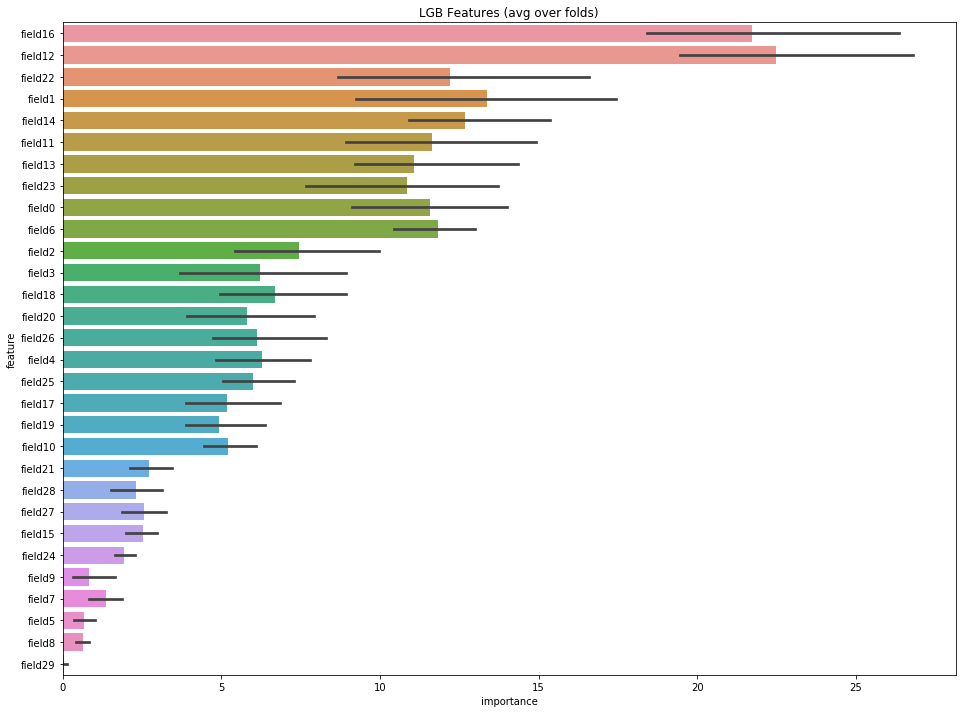

In [22]:
result_dict = train_model_classification_vb( X=X, 
                                             X_test=test, 
                                             columns=train_features,
                                             y=y, 
                                             params=params, folds=folds,
                                             model_type=train_options['model_type'], 
                                             plot_feature_importance=True,
                                             verbose=100, early_stopping_rounds=train_options['early_stopping_rounds'],
                                             n_estimators=train_options['n_estimators'], 
                                             averaging=train_options['averaging'],
                                             groups=X['userid'],
                                             n_jobs=-1)

### add first aggregate node

Fold 1 started at Sun Dec 15 20:21:06 2019
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.892444	training's auc: 0.892444	valid_1's auc: 0.672213	valid_1's auc: 0.672213
Early stopping, best iteration is:
[67]	training's auc: 0.857729	training's auc: 0.857729	valid_1's auc: 0.676682	valid_1's auc: 0.676682
Fold 2 started at Sun Dec 15 20:21:38 2019
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.890783	training's auc: 0.890783	valid_1's auc: 0.705956	valid_1's auc: 0.705956
Early stopping, best iteration is:
[40]	training's auc: 0.817173	training's auc: 0.817173	valid_1's auc: 0.72028	valid_1's auc: 0.720279
Fold 3 started at Sun Dec 15 20:22:05 2019
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.890927	training's auc: 0.890927	valid_1's auc: 0.688385	valid_1's auc: 0.688385
Early stopping, best iteration is:
[33]	training's auc: 0.803194	training's auc: 0.803194	valid

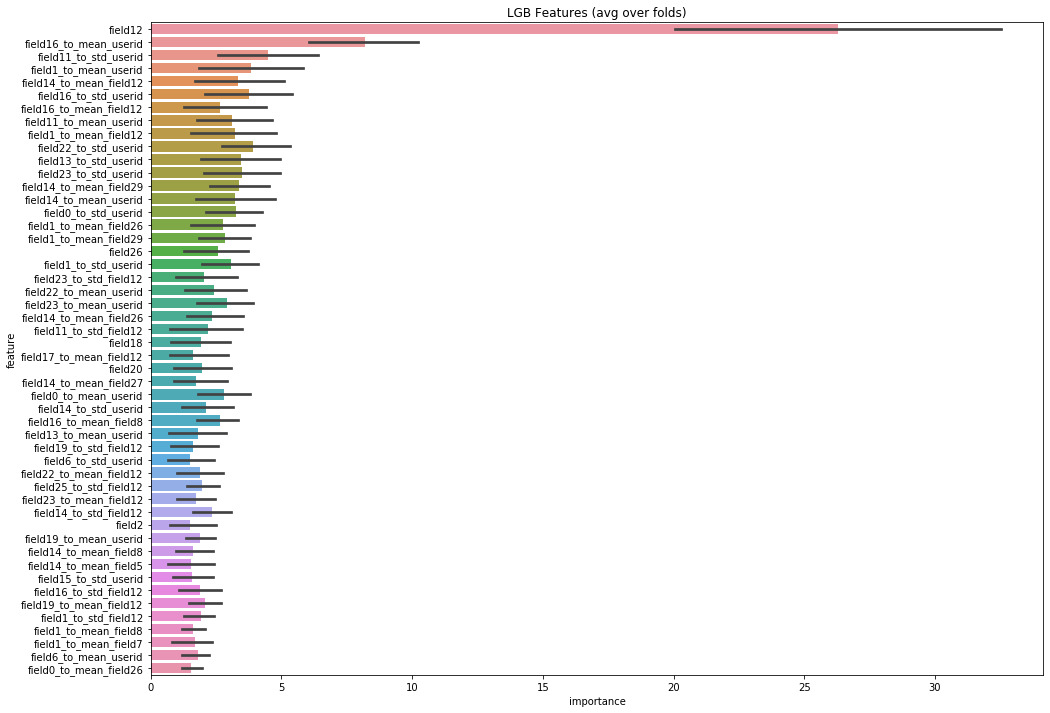

In [13]:
result_dict = train_model_classification_vb( X=X, 
                                             X_test=test, 
                                             columns=train_features,
                                             y=y, 
                                             params=params, folds=folds,
                                             model_type=train_options['model_type'], 
                                             plot_feature_importance=True,
                                             verbose=100, early_stopping_rounds=train_options['early_stopping_rounds'],
                                             n_estimators=train_options['n_estimators'], 
                                             averaging=train_options['averaging'],
                                             groups=X['userid'],
                                             n_jobs=-1)

### More aggregates

Fold 1 started at Mon Dec 16 23:23:56 2019
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.904606	training's auc: 0.904606	valid_1's auc: 0.671887	valid_1's auc: 0.671887
Early stopping, best iteration is:
[50]	training's auc: 0.847829	training's auc: 0.847829	valid_1's auc: 0.676644	valid_1's auc: 0.676644
Fold 2 started at Mon Dec 16 23:24:55 2019
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.900505	training's auc: 0.900505	valid_1's auc: 0.712615	valid_1's auc: 0.712615
Early stopping, best iteration is:
[34]	training's auc: 0.810291	training's auc: 0.810291	valid_1's auc: 0.718987	valid_1's auc: 0.718985
Fold 3 started at Mon Dec 16 23:25:42 2019
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.900145	training's auc: 0.900145	valid_1's auc: 0.694774	valid_1's auc: 0.694774
Early stopping, best iteration is:
[46]	training's auc: 0.84242	training's auc: 0.84242	valid_

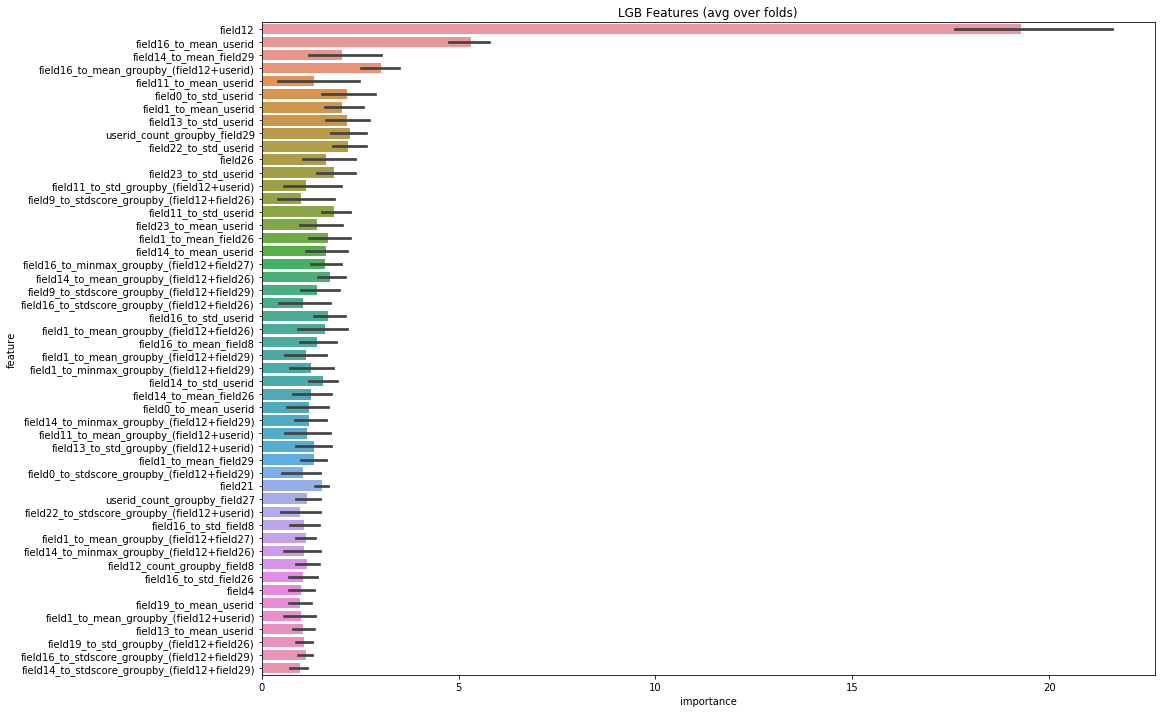

In [15]:
result_dict = train_model_classification_vb( X=X, 
                                             X_test=test, 
                                             columns=train_features,
                                             y=y, 
                                             params=params, folds=folds,
                                             model_type=train_options['model_type'], 
                                             plot_feature_importance=True,
                                             verbose=100, early_stopping_rounds=train_options['early_stopping_rounds'],
                                             n_estimators=train_options['n_estimators'], 
                                             averaging=train_options['averaging'],
                                             groups=X['userid'],
                                             n_jobs=-1)

### Aggs+rfe+tune params (0.6847) - submission_rfe-12-19-20-54.csv

Fold 1 started at Wed Dec 18 21:29:43 2019
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.784354	training's auc: 0.784353	valid_1's auc: 0.671344	valid_1's auc: 0.671339
[200]	training's auc: 0.828908	training's auc: 0.828908	valid_1's auc: 0.676033	valid_1's auc: 0.676032
[300]	training's auc: 0.866599	training's auc: 0.866599	valid_1's auc: 0.678715	valid_1's auc: 0.678715
[400]	training's auc: 0.894881	training's auc: 0.894881	valid_1's auc: 0.679986	valid_1's auc: 0.679986
[500]	training's auc: 0.91094	training's auc: 0.91094	valid_1's auc: 0.67955	valid_1's auc: 0.67955
Did not meet early stopping. Best iteration is:
[500]	training's auc: 0.91094	training's auc: 0.91094	valid_1's auc: 0.67955	valid_1's auc: 0.67955
Fold 2 started at Wed Dec 18 21:32:46 2019
Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.771693	training's auc: 0.771689	valid_1's auc: 0.712078	valid_1's auc: 0.71208
[200]	training's auc:

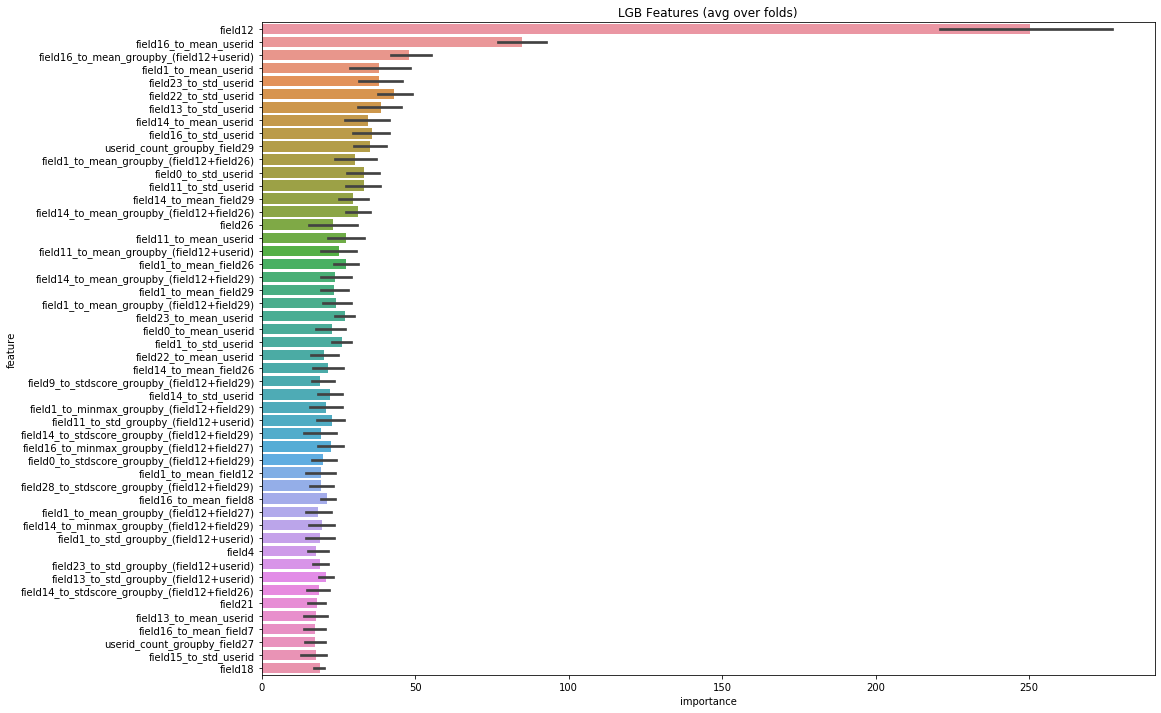

In [19]:
result_dict = train_model_classification_vb( X=X, 
                                             X_test=test, 
                                             columns=train_features,
                                             y=y, 
                                             params=params, folds=folds,
                                             model_type=train_options['model_type'], 
                                             plot_feature_importance=True,
                                             verbose=100, early_stopping_rounds=train_options['early_stopping_rounds'],
                                             n_estimators=train_options['n_estimators'], 
                                             averaging=train_options['averaging'],
                                             groups=X['userid'],
                                             n_jobs=-1)